In [23]:
from datasets.ravdess import Ravdess

dataset = Ravdess("datasets/ravdess/train/train.csv","datasets/ravdess/train/audios")

wave_sample = dataset[0]


In [24]:
# def measure_time(func):
#     def wrapper(*args, **kwargs):
#         from time import time
#         start = time()
#         result = func(*args, **kwargs)
#         print(f'Elapsed time is { (time() - start)} s')
#         return result
#     return wrapper

In [25]:
# Check Speed
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F


# def pad_sequence(batch):
#     # Make all tensor in a batch the same length by padding with zeros
#     batch = [  item.t() for item in batch]
#     # batch = torch.nn.utils.rnn.pad_sequence(batch, batch_first=True, padding_value=0.)
#     # torch.nn.pad
#     # return batch.permute(0, 2, 1)


def collate_fn(batch):

    tensors, targets = [], []

    for waveform, label in batch:

        tensors += [F.pad(waveform, (0, 43000 - waveform.shape[1]))]
        targets += [label]

    tensors = torch.stack(tensors)
    targets = torch.stack(targets)

    return tensors, targets


loader = DataLoader(dataset, 128, collate_fn=collate_fn)

# @measure_time
def run():
    for waves, labels in loader:
        print(waves.shape)


run()


torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([128, 1, 43000])
torch.Size([32, 1, 43000])


In [26]:
print ( dataset.get_sr() )
# ipd.

48000


In [29]:
wave = dataset[100][0]
wave

tensor([[ 3.9171e-05,  8.7547e-05,  1.0741e-04,  ...,  1.4785e-07,
         -3.7672e-07, -9.6079e-06]])

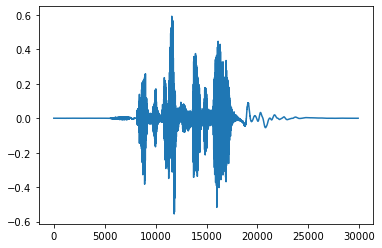

In [30]:
import matplotlib.pyplot as plt 

plt.plot(wave[0] )
plt.show()
